# Traveling salesman problem :) for smaller nodes

Travelling Salesman Problem (TSP): Given a set of cities and distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point.

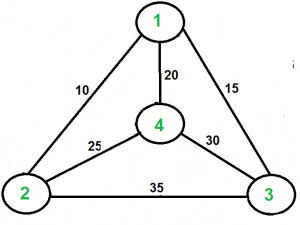

## Representing the above graph in 2d Array
### The cost(edge value) of node 1 to 2 is represented by value graph[1][2] which is equal to 10

In [162]:
graph=[
    [0,10,15,20],
    [10,0,35,25],
    [15,35,0,30],
    [20,25,30,0]
]
graph

[[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]

# Simple solution
 Calculate cost of every possible routes from given starting point (using permutation) and select the least costly one 
### If we start from node 1 .. various routes would be 

|Routes     | Cost|
|-----------|-----| 
|1-2-3-4-1  | 95  |
|1-2-4-3-1  | 80  |
|1-3-2-4-1  | 95  |

NOte that in actual implementation index starts from 0 so 1st route in table would be 0-1-2-3-0 Indicated by [0-1-2-3] here.

### Algorithm
1. Consider any one city as starting point (say node 1)
2. Generate all (n-1)! permutations routes keeping 1 const (2,3,4)
3. Calculate cost of every permutation and keep track of min permutation
4. Return permutation with the minimum cost

## First Lets See About Finding permutation of a given list

### Permutation is implemented using recursion and backtracking

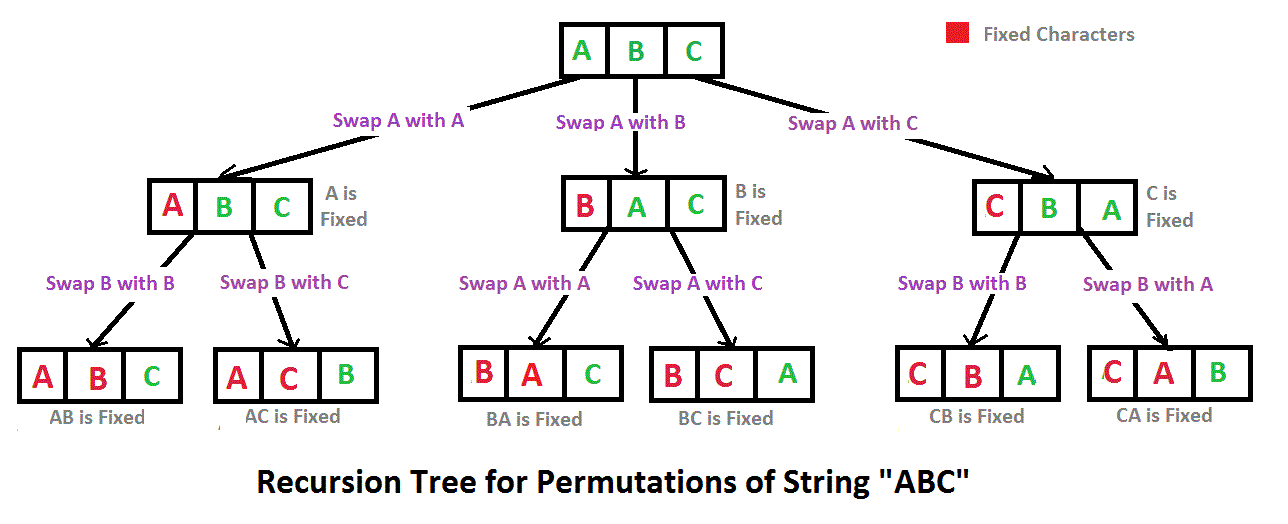

### This algorithm requires swap which is very easy to do in python :D like so
`x, y = y, x `
#### here x and y values are swapped :D

## also note that 
`for i in range(1,3):
     print(i)  # output is 1 2 (3 is excluded)` 
### Here 3 is excluded so loop runs 2 times from i = 1 to 2 i.e output is 1 2 

In [119]:
def permute(a, l, r):
    if(l==r):
        print(a,'\n')
        return a;
    else:
        for i in range(l,r+1):
            a[l], a[i] = a[i], a[l] #swap lth and ith string
            permute(a, l+1, r) #keeping lth char fixed permute l+1 to r string
            a[l], a[i] = a[i], a[l]

In [260]:
permute([1,2,3,4], 1, 3)

[1, 2, 3, 4] 

[1, 2, 4, 3] 

[1, 3, 2, 4] 

[1, 3, 4, 2] 

[1, 4, 3, 2] 

[1, 4, 2, 3] 



We will use above permutation technique later

## Making a cost calculating function that calculates total cost of a given list of permutation 
## Example for route 0-1-2-3-0
### TotalCost[0,1,2,3]  -> cost[0,1]+cost[1,2] + cost[2,3] + cost[3,0]


In [245]:
def calculateCost(perm):
    cost=0;
    for i in range(len(perm)-1):
        cost += graph[perm[i]][perm[i+1]]
    
    #add cost of last node to initial node 
    cost += graph[perm[len(perm)-1]][perm[0]]
    return cost   

In [246]:
calculateCost([0,1,2,3]) #testing calculateCost function

95

## Refining our permutation for finding maximum cost
### Since its a recursive function the only way i found to keep track of minimum cost and optimal path was to use global variable (minimumCost, optimalPath)
## So u have to declare global variables minimumCost,  optimalPath and graph before calling this function for it to work properly

In [244]:
def calculateMinCostPermutation(a,l,r):
    
    if(l==r):
        cost = calculateCost(a)
        global minimumCost,optimalPath
        if (minimumCost>cost):
            minimumCost=cost
            optimalPath=a
        print('Route',a,'Cost: ',calculateCost(a),'\n')
    
    else:
        for i in range(l,r+1):
            a[l], a[i] = a[i], a[l]
            calculateMinCostPermutation(a,l+1,r)
            a[l], a[i] = a[i], a[l]

## Now Onto the Final Algorithm (Simple Solution)

### Set global variables (minimumCost and optimalPath) first


In [253]:
graph=[
    [0,10,15,20],
    [10,0,35,25],
    [15,35,0,30],
    [20,25,30,0]
]
initialguess= [0,1,2,3] # setting initial guess to 0-1-2-3-0
minimumCost = calculateCost(initialguess)
optimalPath = initialguess

In [255]:
calculateMinCostPermutation([0,1,2,3],1,3)
print('Optimal Path',optimalPath,'Cost',minimumCost)

Route [0, 1, 2, 3] Cost:  95 

Route [0, 1, 3, 2] Cost:  80 

Route [0, 2, 1, 3] Cost:  95 

Route [0, 2, 3, 1] Cost:  80 

Route [0, 3, 2, 1] Cost:  95 

Route [0, 3, 1, 2] Cost:  95 

Optimal Path [0, 1, 2, 3] Cost 80


## Example2  5 nodes (0,1,2,3,4)

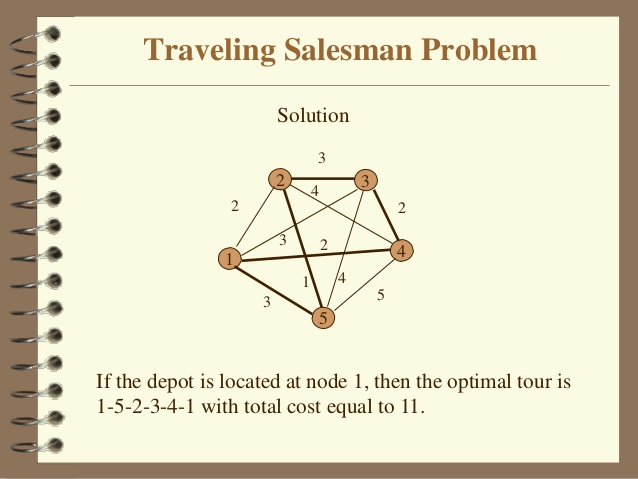

In [256]:
graph = [
    [0,2,3,2,3],
    [2,0,3,4,1],
    [3,3,0,2,4],
    [2,4,2,0,5],
    [3,1,4,5,0]
]

In [258]:
initialguess=[0,1,2,3,4] #setting initial guess to 0,1,2,3,4,0
minimumCost=calculateCost(initialguess)
optimalPath=initialguess

In [259]:
calculateMinCostPermutation([0,1,2,3,4],1,4)
print('Optimal Path',optimalPath,'Cost',minimumCost)

Route [0, 1, 2, 3, 4] Cost:  15 

Route [0, 1, 2, 4, 3] Cost:  16 

Route [0, 1, 3, 2, 4] Cost:  15 

Route [0, 1, 3, 4, 2] Cost:  18 

Route [0, 1, 4, 3, 2] Cost:  13 

Route [0, 1, 4, 2, 3] Cost:  11 

Route [0, 2, 1, 3, 4] Cost:  18 

Route [0, 2, 1, 4, 3] Cost:  14 

Route [0, 2, 3, 1, 4] Cost:  13 

Route [0, 2, 3, 4, 1] Cost:  13 

Route [0, 2, 4, 3, 1] Cost:  18 

Route [0, 2, 4, 1, 3] Cost:  14 

Route [0, 3, 2, 1, 4] Cost:  11 

Route [0, 3, 2, 4, 1] Cost:  11 

Route [0, 3, 1, 2, 4] Cost:  16 

Route [0, 3, 1, 4, 2] Cost:  14 

Route [0, 3, 4, 1, 2] Cost:  14 

Route [0, 3, 4, 2, 1] Cost:  16 

Route [0, 4, 2, 3, 1] Cost:  15 

Route [0, 4, 2, 1, 3] Cost:  16 

Route [0, 4, 3, 2, 1] Cost:  15 

Route [0, 4, 3, 1, 2] Cost:  18 

Route [0, 4, 1, 3, 2] Cost:  13 

Route [0, 4, 1, 2, 3] Cost:  11 

Optimal Path [0, 1, 2, 3, 4] Cost 11


## References
[Permutation](https://www.geeksforgeeks.org/write-a-c-program-to-print-all-permutations-of-a-given-string/)
[Overview Of TSP](https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/)
